# HEART DISEASE CLASSIFICATION PROBLEM

In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("./heart-disease.csv")
heart_disease.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [3]:
!pip install --upgrade scikit-learn

In [4]:
len(heart_disease)

303

In [5]:
# create x (features Matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

In [6]:
# <Dropped the column (x)>
x 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
# <only target values>
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


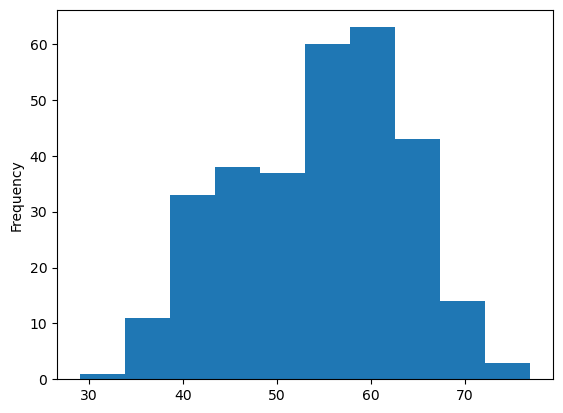

In [9]:
# create a histogram of age
heart_disease["age"].plot.hist(bins=10);

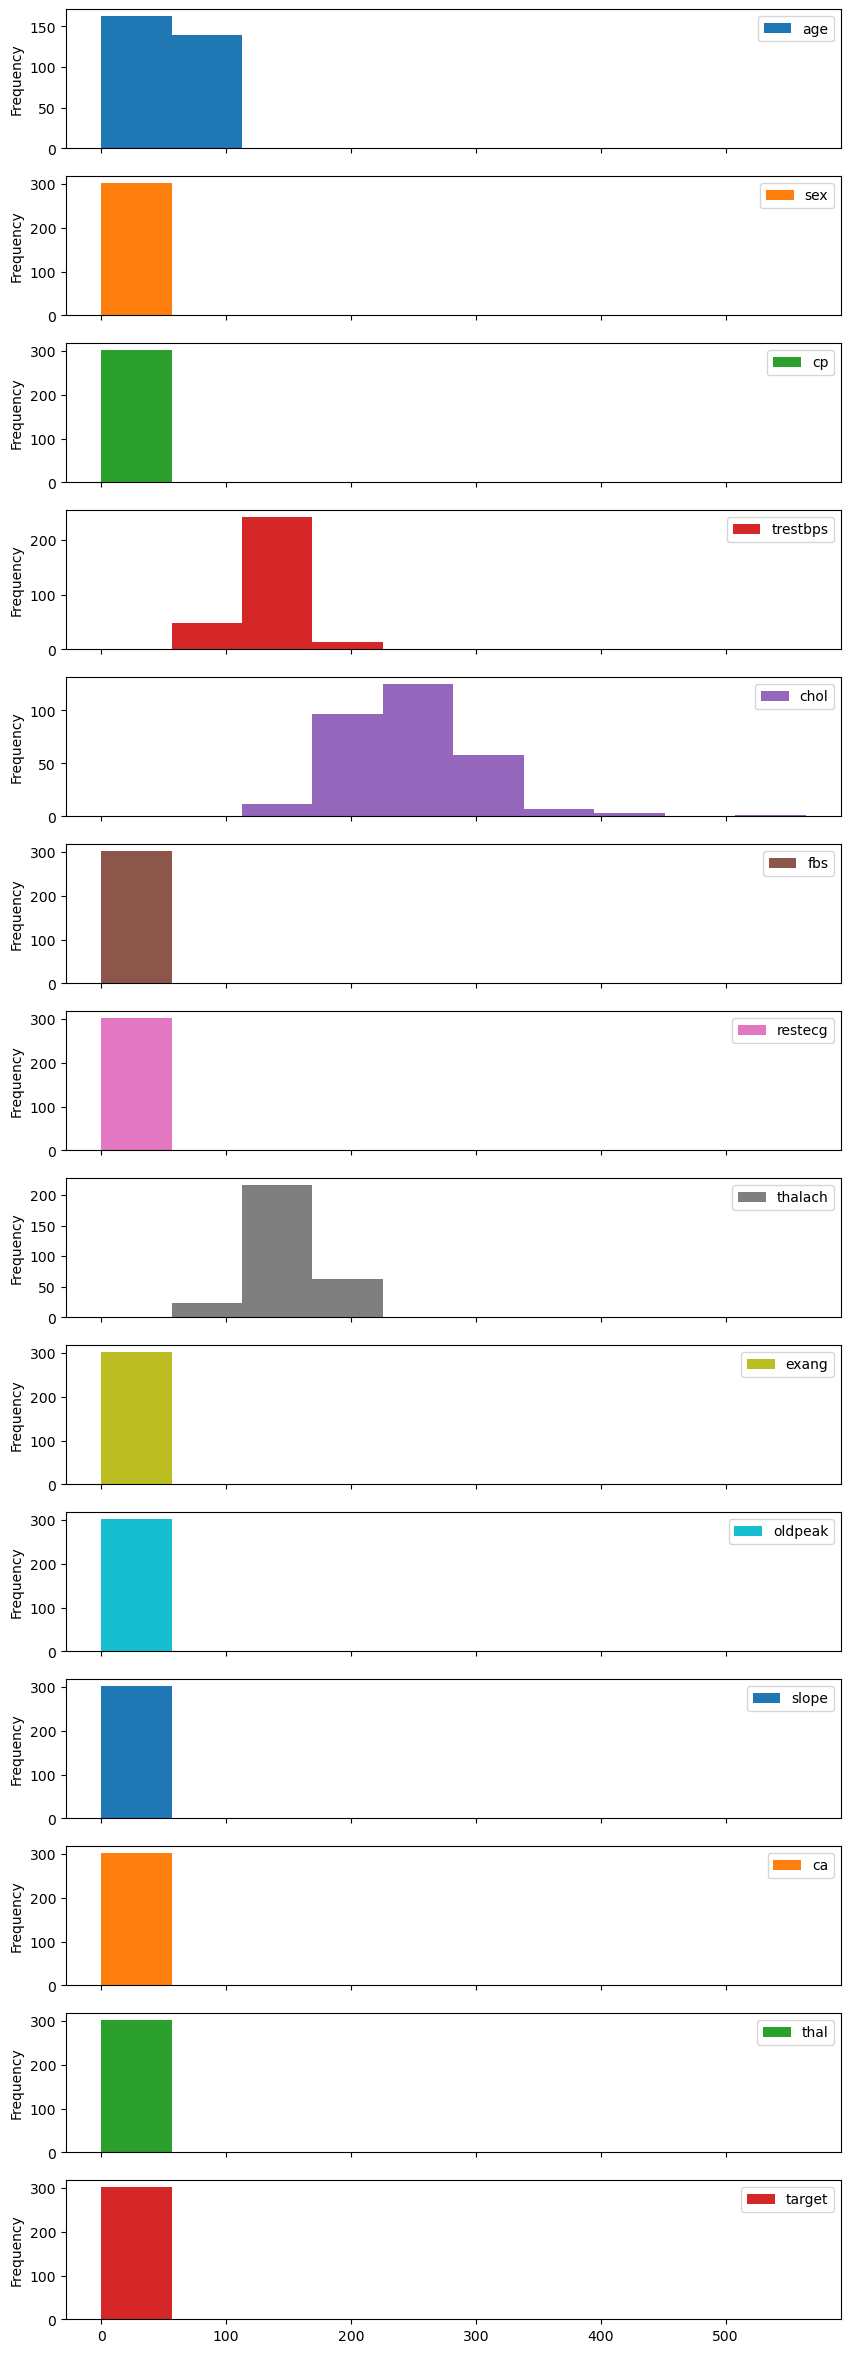

In [10]:
# heart_disease["age"].plot.hist(subplots=True);
heart_disease.plot.hist(figsize=(10,30),subplots=True);

In [35]:
over_50 = heart_disease[heart_disease["age"]>1]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='age', ylabel='chol'>

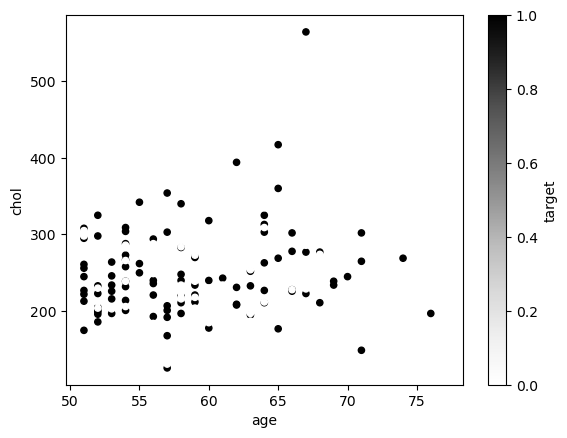

In [12]:
# Pyplot method
over_50.plot(kind='scatter',
            x='age',
            y='chol',
             c='target')

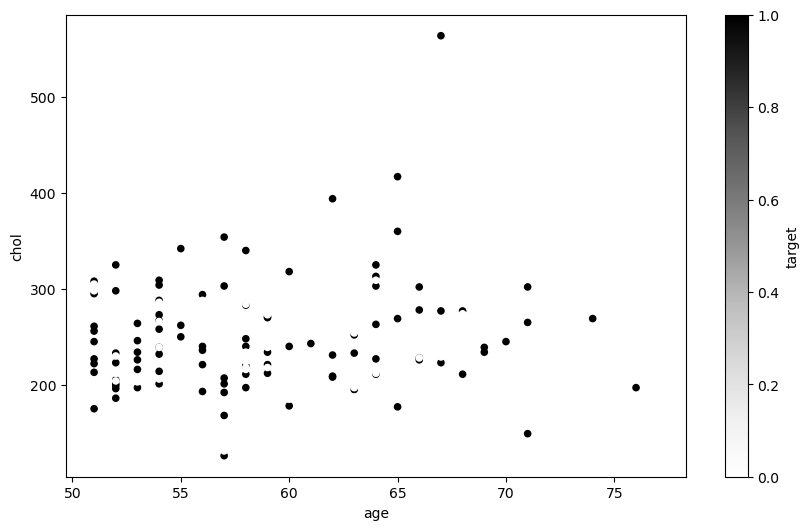

In [13]:
# Oo method
fig,ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
             c='target',
            ax=ax
            );


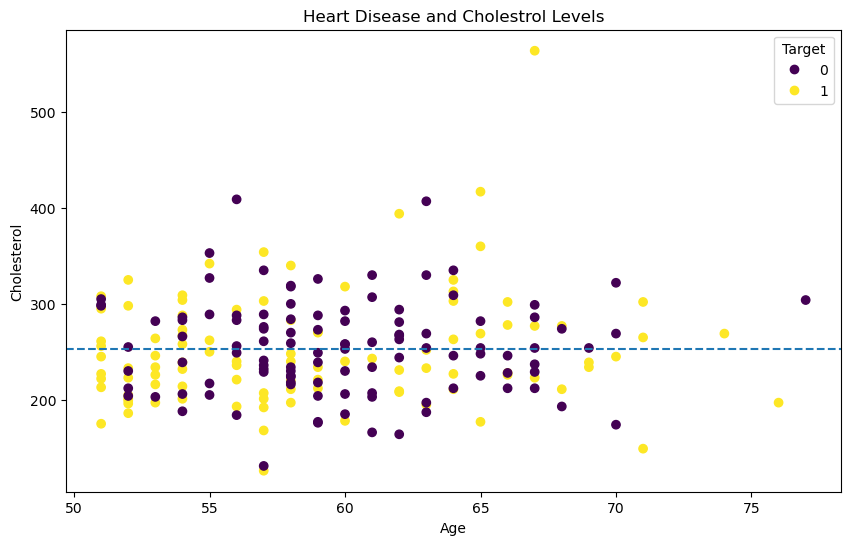

In [14]:
# OO method from scrach
fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

In [15]:
# See the differnet stykes available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: >

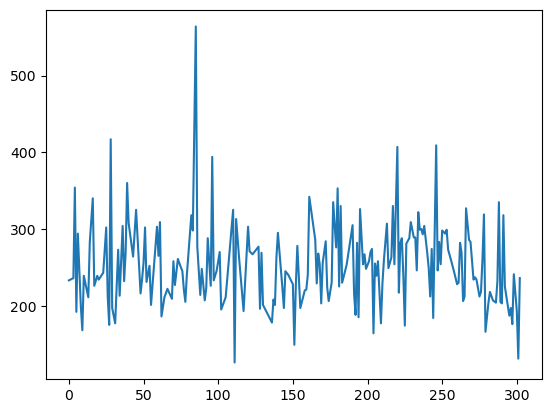

In [16]:
over_50["chol"].plot()

# y = chol
# x = age 

<Axes: >

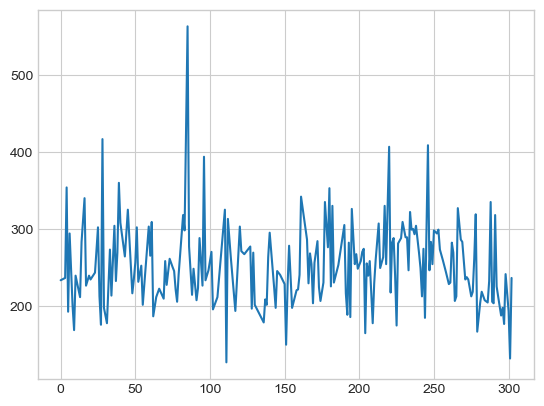

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')
over_50["chol"].plot()

<Axes: >

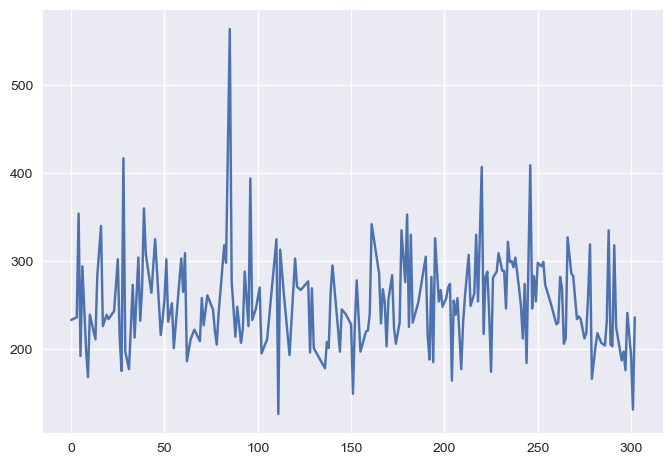

In [18]:
plt.style.use("seaborn-v0_8")
over_50["chol"].plot()

# Choose the right model or hyper parameters -----  

In [19]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Fit the model for training data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
clf.fit(X_train, y_train);

In [22]:
import numpy as np 
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [23]:
y_test

29     1
188    0
224    0
273    0
221    0
      ..
231    0
220    0
41     1
291    0
258    0
Name: target, Length: 61, dtype: int64

In [24]:
clf.score(X_train, y_train)

1.0

In [25]:
clf.score(X_test, y_test)

0.7868852459016393

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [27]:
accuracy_score(y_test, y_preds)

0.7868852459016393

 # Improving Model

In [28]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 83.61%

Trying model with 30 estimators...
Model accuracy on test set: 83.61%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 85.25%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 86.89%



# Save a model and load it

In [29]:
import pickle

# pickle.dump(clf, open("random_forest_model_1.pkl","wb"))
# import pickle

# Assuming 'clf' is your model object
with open("random_forst_model_1.pkl", "wb") as file:
    pickle.dump(clf, file)

In [30]:
# Using the 'with' statement to open and automatically close the file
with open("random_forst_model_1.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model as needed
loaded_model.score(X_test, y_test)


0.8688524590163934

In [31]:
import sklearn
print(sklearn.__version__)


1.5.1


In [32]:
import pickle
import numpy as np

# Load the trained model
with open(r'C:\Users\PMLS\Documents\Artificial Intelligence\random_forst_model_1.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)



# Prepare new data (without the target variable)
new_data_single_row = np.array([
    [35, 0, 2, 140, 160, 0, 1, 90, 1, 6.5, 1, 1, 0]
])



# Make predictions
predictions = loaded_model.predict(new_data_single_row)

# Inspect predictions
print(predictions)


[0]


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
